In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file into a pandas DataFrame
df1 = pd.read_csv('data_ganjar.csv')
df2 = pd.read_csv('data_ganjar13.csv')
df3 = pd.read_csv('data_ganjarNeg.csv')

df_ganjar = [df1, df2, df3]
df_ganjar = pd.concat(df_ganjar, ignore_index=True)
df_ganjar

# Display the DataFrame
data_ganjar = df_ganjar[['full_text','sentimen']]
data_ganjar

,full_text,sentimen
0,@gennnngenn @tempodotco gasspoll memangkan gan...,positif
1,Dukungan masyarakat tumbuh untuk Ganjar-Mahfud...,positif
2,@ch_chotimah2 Ganjar Mahfud harus didukung sem...,positif
3,Ganjar-Mahfud menjadi harapan besar bagi penge...,positif
4,Ganjar-Mahfud akan menjaga keberlanjutan danau...,positif
...,...,...
1753,Faktanya CUPU sok SUHU.. #anakpresiden #Ganja...,negatif
1754,@cagubnyinyir2 @BoyMantouw @mas_alku @wonggend...,negatif
1755,@Andi54582715 @Omnya_Gibran @jokowi Memang Klo...,negatif
1756,Jelaskan Jangan Membodohi Rakyat dan Pengamat ...,negatif


### Bersihkan Data

In [3]:
# melihat dan Hapus data yang kosong
data_ganjar.isnull().sum()

full_text      0
sentimen     595
dtype: int64

In [4]:
data_ganjar.shape

(1758, 2)

In [5]:
data_ganjar = data_ganjar.dropna()

In [6]:
data_ganjar.shape

(1163, 2)

In [7]:
# melihat data yang duplicate dan menghapusnya
data_ganjar.duplicated().sum()

50

In [8]:
data_ganjar = data_ganjar.drop_duplicates()

In [9]:
data_ganjar.duplicated().sum()

0

In [10]:
data_ganjar.shape

(1113, 2)

In [11]:
# fungsi menghapus karakter khusus
def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?://\S+', '', text)
    
    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

data_ganjar['full_text'] = data_ganjar['full_text'].apply(clean_twitter_text)

In [12]:
# melihat data yang sama lagi
data_ganjar.duplicated().sum()

67

In [13]:
data_ganjar = data_ganjar.drop_duplicates()

In [14]:
data_ganjar.duplicated().sum()

0

In [15]:
data_ganjar.shape

(1046, 2)

# Preprocessing Text

### 1. Case Folding

In [16]:
# Mengubah kata Huruf besar menjadi huruf kecil
data_ganjar['full_text'] = data_ganjar['full_text'].str.lower()
data_ganjar

,full_text,sentimen
0,gasspoll memangkan ganjarmahfud,positif
1,dukungan masyarakat tumbuh untuk ganjarmahfud ...,positif
2,ganjar mahfud harus didukung semua orang hebat...,positif
3,ganjarmahfud menjadi harapan besar bagi pengel...,positif
4,ganjarmahfud akan menjaga keberlanjutan danaud...,positif
...,...,...
1753,faktanya cupu sok suhu,negatif
1754,terpaksa kayanya harus nurut sama emak,negatif
1755,memang klo pengkianat itu sekali melakukan unt...,negatif
1756,jelaskan jangan membodohi rakyat dan pengamat ...,negatif


In [17]:
data_ganjar.shape

(1046, 2)

### 2. Stopword

In [18]:
# Menghilangkan kata-kata yang tidak memilki bobot
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_word = ["tidak","prabowo","gibran","anis","muhaimin","ganjar","mahfud"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_word)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

data_ganjar['full_text'] = data_ganjar['full_text'].apply(lambda x: stopword(x))
data_ganjar

,full_text,sentimen
0,gasspoll memangkan ganjarmahfud,positif
1,dukungan masyarakat tumbuh ganjarmahfud menjag...,positif
2,mahfud didukung semua orang hebat pol,positif
3,ganjarmahfud menjadi harapan besar pengelolaan...,positif
4,ganjarmahfud menjaga keberlanjutan danaudanau ...,positif
...,...,...
1753,faktanya cupu sok suhu,negatif
1754,terpaksa kayanya nurut sama emak,negatif
1755,memang klo pengkianat sekali melakukan selamax...,negatif
1756,jelaskan jangan membodohi rakyat pengamat yg l...,negatif


### 3. Normalisasi

In [19]:
# Mengubah kata singkat menjadi normal
norm = {'sy':'saya','tau':'tahu','perubahancoblos':'perubahan coblos','utk':'untuk',
        'yg':'yang','org':'orang','pd':'pada','ganjar':'','mahfud':'','prabowo':'',
        'gibran':'','anis':'','muhaimin':'','trus':'terus','tkut':'takut','amin':'',
        'yang':'','pak':''}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

data_ganjar['full_text'] = data_ganjar['full_text'].apply(lambda x:normalisasi(x))
data_ganjar

,full_text,sentimen
0,gasspoll memangkan,positif
1,dukungan masayaarakat tumbuh menjaga kualitas...,positif
2,didukung semua orang hebat pol,positif
3,menjadi harapan besar pengelolaan sumb3r daya...,positif
4,menjaga keberlanjutan danaudanau sebagai wari...,positif
...,...,...
1753,faktanya cupu sok suhu,negatif
1754,tersa kayanya nurut sama emak,negatif
1755,memang klo pengkianat sekali melakukan selamax...,negatif
1756,jelaskan jangan membodohi rakyat pengamat lug...,negatif


### 4. Tokenizing

In [20]:
# Memisahkan kata dalam suatu kalimat
tokenized = data_ganjar['full_text'].apply(lambda x:x.split())
tokenized

0                                   [gasspoll, memangkan]
1       [dukungan, masayaarakat, tumbuh, menjaga, kual...
2                    [didukung, semua, orang, hebat, pol]
3       [menjadi, harapan, besar, pengelolaan, sumb3r,...
4       [menjaga, keberlanjutan, danaudanau, sebagai, ...
                              ...                        
1753                          [faktanya, cupu, sok, suhu]
1754                  [tersa, kayanya, nurut, sama, emak]
1755    [memang, klo, pengkianat, sekali, melakukan, s...
1756    [jelaskan, jangan, membodohi, rakyat, pengamat...
1757    [terbaik, nyulik, kangkangi, mk, disetir, ibu,...
Name: full_text, Length: 1046, dtype: object

### 5. Stemming

In [21]:
# Mengubah kata imbuhan menjadi kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)

gasspoll memang
dukung masayaarakat tumbuh jaga kualitas udara bersih sejahtera kali lipat indonesia hebat
dukung semua orang hebat pol
jadi harap besar kelola sumb3r daya alam rencana pranowo baik rakyat
jaga lanjut danaudanau bagai waris alam harga sejahtera lipat ganda indonesia makmur sentosa
salam 3 jari gasspoll menang
gaspol semua dukung selalu
buka wawas ikn cipta lapang kerja juga sedia ruang tumbuh ekonomi inklusif pranowo hanya dia betul rakyat akan buat
bicara antusias bagaimana ikn tingkat aksesibilitas didik sehat pranowo dia betul rakyat akan buat lebih
yuk jadi masa depan lebih cerah semangat inspirasi pranowo sama prof md
semangat menggebugebu raih citacita tinggi ikut semangat juang pranowoprof md
berani kaum perempuan gen z generasi muda dukung terobos positif duet pranowo md
kita bersamasama gapai citacita tinggi semangat bangun masa depan lebih baik bagaimana ingat pranowoprof md
pimpin luar biasa mantep pranowo prof md tos jadi pilih nu panggih ku sagala urang jeu

wuihhjj semarak hajat rakyat semarang gegap gempita puluh ribu massa hadir rela hujanhujanan tak jadi hambat mereka menang
pokok kawal terus 2024
sosok paham agam perempuan kaya maju bangsa tiga kali lebih sejahtera indonesia jaya
keliling orang2 baik hebat
suatu karya hasil arti efektif n harga calon pimpin bijak luar biasa mas
apa selalu dukung kawal menang
yakin menang culas curang kalah
panggah dukung pranowo md
selesai bazzar murah meetimg urus ganesa jawa barat koordimasi acara 21 januari 2024 bandung kira tuhan restu perjuanhan pata rawan preaiden amp walil presiden 2024 2029
mantap komedian cerdas cak lontong ini idola jarang2 aku idola tokoh publik aku senang bliau dukung terima kasih cak lontong salam lemper salam 3 jari
gaspol dukung
semangat pranowo md tuju menang pilpres
all in
masayaaallah sehat selalu hebat
dukung pranowo md indonesia lebih unggul
semangat pranowo md
selalu doa sangat harap dan bisa menang satu putar
pranowo sangat paham butuh ingin rakyat indonesia sala

capres cawapres pranowo md pilih bukti banyak gagas terap pimpin
ajak semua warga negara pilih pimpin bisa libat hati otak ajak pilih capres cawapres pranowo md
hanya joget makna capres cawapres pranowo md punya gagas jelas tegas
gaspol tuju 2024 moga wujud semua gagas ide
tetap konsisten pilih
gaspol dukung
tim rapat kuy menang nomor 3
pimpin masa depan harap integrasi bijak tani lebih holistik lanjut tani bukan soal produksi juga soal imbang ekosistem kualitas hidup tani
pimpin butuh rakyat
capres cawapres pranowo md bukan pintar gerak panggung juga cerdas cipta bijak
capres cawapres pranowo md bukan pintar joget dia sosok penuh gagas positif
dan siti atikoh tutup tahun ziarah makam ortu
selalu support indonesia lwbih baik
rawan bagi ribu telur sosialisasi ktp sakti
all in
2024 md
ajak keluarga temantemanmu pilih pimpin punya visi jelas ajak pilih capres cawapres pranowo md
jangan pesona joget capres cawapres pranowo md punya gagas nyata indonesia
capres cawapres pranowo md bukan cip

pranowo kampanye wonogiri hari md lanjut banyuwangi
salam toleransi respect mohmd lanjuntukangansemuakerja hebat debat buruh naik kelas
contoh buzzer tololl keren kok nyungsep hebat debat buruh naik kelas
cindy1764852573 fagtng sehat pa hebat debat ktp sakti
rstmbcl dukung dari awal sikatkorupsi lanjutgansemuamurah lanjutgansemuakerja hebat debat sikat kkn
salam tiga jari moga bawah pimpin tani hidup sejahtera
pikiranrakyat sangat dapat hebat debat ktp sakti
erasmus70 salut bela bem ui rispekkk hebat debat nelayansejahtera
nongandah harmonis sekali pasang hebat debat tani bangga tan
detikcom paling tenang gamamenang hebat debat guru ngaji satu juta
nongandah sangat serasi sekali dan bu atikoh hebat debat perempuan maju
apa jadi hati moga m3nang hebat debat ktp sakti
jellicent menang dongg sikatkorupsi lanjutgansemuamurah lanjutgansemuakerja hebat debat tani bangga tan
nongandah senyum tulus sekali bu atikoh hebat debat perempuan maju
sangat yakin dukung indonesia sejahtera
sama tani te

kakakica pranowo aamiinsemoga innovasi anak negeri mampu fasilitas apresiasi masa pimpin ri1 hebat juara debat
satu putar
pelopor mimpi keluarga
dukung penuh upaya pasti dapat jalan tugas integritas tanpa langgar
alyahmila pranowo emang paling bijak cari solusi ekonomi hebat juara debat
strategi bebas nelayan jerat utang
lebih baik siap segala
cuma sat set tas tes gas polll paling langsung eksekusi kasih solusi suatu masalah gen z millenial baby boomers pilih
aku tetap gaspoll dukung
yakin raup suara banyak jateng masayaarakat nonton debat pilih
indonesia lebih baik sama yakin
pimpin memilki toleransi umat agama selamat hari natal raya
semangat kawal terus smpai m3nang satu putar
program program baik
antusias warga solo pada datang ba luar biasa sekali terimakasih solo atas dukung untuk
keren dan dua namnya seat tingkat ekonomi mulai langkahlangkah bersih korupsi
indonesia lebih baik
selamat tahun baru moga 2024 akan pimpin
ini penting nya alam alam akan bohong cara tanggap dan memang 

visimisi jelas ingin sejahtera rakyat sebab dua komitmen buka 17 juta lapang kerja rakyat indonesia dapat kerja layak sekaligus putus rantai miskin
gin nih pimpin ga beda rakyat all in pokok
siapa sih akan bangga punya ibu negara buk atikoh hambel energik rakyat moga menang pilpres 2024
kan 3 strategi stabil bahan pokok partai perindo ampuh kendali harga
gebrak ning atiqoh juang dukung laku kampanye jawa timur
sama yakin indonesia bebas korupsi
mau gimanapun tetap all in pokok
selalu dukung
menang pilpres nye ye bro insayaaallah aamiin yra
terima kasih atas komitmen berantas korupsi ke akarakarnya tega hukum ruu ampas aset koruptor jadi langkah konkret capai tuju
arsjadrasjid mohmd moga laris m merchandise makin sukses depan bersih kuatkankpk hebat presiden lanjutgan bansos rakyat
emelecesecuador jokowi tweet cakiminow rizieqdivist dar4ra effendiristriy1 terus semangat juang 45 bersih kuatkankpk hebat presiden lanjutgan bansos rakyat
bu atikoh sangat cocok memang jadi ibu negara sangat

md siap debat capres cawapres debatcapres 6fzqzeiogg bersih kuatkankpk hebat presiden lanjutgan bansos rakyat
makin yakin pilih
gass poko all in buat dan
pasang siap maju umkm sahabat generasigotongroyong presiden untuksemua 2024 22rfreit2h bersih kuatkankpk hebat presiden lanjutgan bansos rakyat
alhamdulillah semangat terus dan moga pilpres tahun m3nang sikatkorupsi bersih kuatkankpk hebat presiden lanjutgan bansos rakyat
moga ini bawa selang lebih dekat menang
tetap all in
rawan kagama galang dukung gera kaos rakyat
moga depan lebih banyak kumandang sholawat tiap jalan pranowo md negeri dalam kampanye suara baik
yakin menang 1 putara
hujan halang warga sleman dukung menang pilpres 2024
tpn sila bawaslu usut muncul tni aktif debat capres
sholulohualla muhammad moga m3nang
2024 siap dukung
klepekklepek belah sana kayak cacing panas gelecetgelecet lihat ibu siti atikoh mas alam ikut kampanye bantu pranowo md suara suara adil benar negeri
baik selalu usaha beri baik rakyat maju bangsalan

gak ragu sih buat dkung
waduu ak sih dkkungnya aja sih
pranowo md pimpin unggul visi baik bukan sekadar gimmick
habis nonton debat makin yakin pilih no one left behind
all in semangat sukses selalu
gaspoll dukung baik
keblinger kuasa hingga terjang daulat rakyat terjerembab sungkur moga lekas sembuh rakyat tetap sama
ngkongroses mana dukung gue qt pemilunetwork voting capres amp cawapres 2024 pilih kalian 1x24 jam bersih kuatkankpk hebat
pilih tepat selesai ham masa lalu
tetep optimis pilih bakal majuuu terus semangat no one left behind
memang cuma sih baik yakam
fixx pilih no one left behind
ak dkungnya aja deh soal konsisten banget
percaya sama kualitsd sih klo ak tuh
jelasjelas jangan abu2 banyak janji tidak tegas tindak jelas tetap pilih no one left behind
mangkaanya ak dkungnya aaja sih
pasti aja pilih no one left behind
kerja nyata hanya sih
pilih perhati beberapa faktor makin yakin mereka cocok figur pimpin indonesia no one left behind
nah enih pilih hitam hitam putih putih no o

tersa kaya nurut sama emak
memang klo pengkianat sekali laku selamax tetsp krn gsk tahu diri gak tahu terima kasih gak tahu balas budiakax ayo sama2 hukum dg cara gak usah pilih pilih adil adil adilx
jelas jangan bodoh rakyat amat lugu fokus aje lorot bawah yohanies
baik nyulik kangkang mk setir ibu hormat kiai emosi darah stabil awokwowkwk lari debat gagas citra sembunyi sadis


In [22]:
df_ganjar = pd.merge(tokenized, data_ganjar[['sentimen']], left_index=True, right_index=True)

In [23]:
# melihat data kosong
df_ganjar.isnull().sum()

full_text    0
sentimen     0
dtype: int64

In [24]:
df_ganjar = df_ganjar.dropna()
df_ganjar.isnull().sum()

full_text    0
sentimen     0
dtype: int64

In [25]:
# melihat data yang sama
df_ganjar.duplicated().sum()

18

In [26]:
df_ganjar = df_ganjar.drop_duplicates()
df_ganjar.duplicated().sum()

0

In [27]:
df_ganjar.shape

(1028, 2)

In [52]:
df_ganjar.to_csv("hasil_stemming_preprocessing_ganjar.csv", index=False)

In [28]:
dataset = pd.read_csv('hasil_stemming_preprocessing_ganjar.csv')
dataset

,full_text,sentimen
0,gasspoll memang,positif
1,dukung masayaarakat tumbuh jaga kualitas udara...,positif
2,dukung semua orang hebat pol,positif
3,jadi harap besar kelola sumb3r daya alam renca...,positif
4,jaga lanjut danaudanau bagai waris alam harga ...,positif
...,...,...
1023,fakta cupu sok suhu,negatif
1024,tersa kaya nurut sama emak,negatif
1025,memang klo pengkianat sekali laku selamax tets...,negatif
1026,jelas jangan bodoh rakyat amat lugu fokus aje ...,negatif


In [29]:
# melihat data yang sama
dataset.duplicated().sum()

0

In [30]:
# melihat data yang kosong
dataset.isnull().sum()

full_text    1
sentimen     0
dtype: int64

In [31]:
dataset = dataset.dropna()
dataset.isnull().sum()

full_text    0
sentimen     0
dtype: int64

In [33]:
dataset.shape

(1027, 2)

In [34]:
# melihat total data positif
dataset[dataset['sentimen'] == 'positif'].count()

full_text    993
sentimen     993
dtype: int64

In [35]:
# melihat total data negatif
dataset[dataset['sentimen'] == 'negatif'].count()

full_text    34
sentimen     34
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

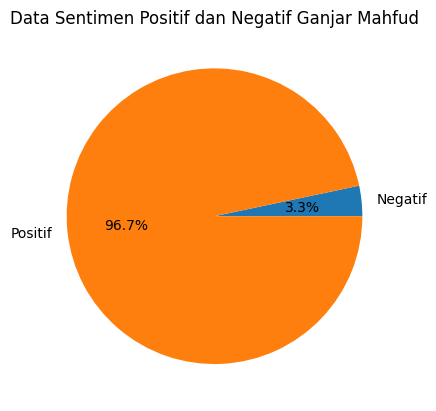

In [62]:
import numpy as np

sentimenno = [np.count_nonzero(dataset['sentimen'] == 'negatif'), np.count_nonzero(dataset['sentimen'] == 'positif')]
label = ['Negatif','Positif']
plt.title('Data Sentimen Positif dan Negatif Ganjar Mahfud')
plt.pie(sentimenno, labels=label,radius=1, startangle=0, autopct='%.1f%%', shadow=False)
plt.show